In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline
import re

In [2]:
# Load the CardiffNLP Twitter sentiment model
model_name = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Initialize the sentiment pipeline
sentiment_analyzer = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

text_file='C:/Users/aakjo/OneDrive/Documents/GitHub/project-NARC/ml/test_chat.txt'
# Load the chat log from a text file
with open(text_file, "r", encoding="utf-8") as file:
    chat_log = file.readlines()

# Label mappings for the CardiffNLP model
label_mapping = {
    "LABEL_0": "NEGATIVE",
    "LABEL_1": "NEUTRAL",
    "LABEL_2": "POSITIVE"
}

results = []
for line in chat_log:
    try:
               # Use regex to extract sender, timestamp, and message
        match = re.match(r"^(.*?)(\d{1,2}:\d{2}\s?[APap][Mm]):\s(.*)$", line.strip())
        if match:
            sender = match.group(1).strip()
            timestamp = match.group(2).strip()
            message = match.group(3).strip()


        # Perform sentiment analysis
        sentiment = sentiment_analyzer(message)[0]
        sentiment_label = label_mapping[sentiment["label"]]

        # Append results to the list
        results.append({
            "sender": sender.strip(),
            "timestamp": timestamp.strip(),
            "message": message,
            "sentiment": sentiment_label,
            "confidence": sentiment["score"]
        })
    except Exception as e:
        print(f"Error processing line: {line.strip()}. Error: {e}")
        continue


Sentiment Analysis DataFrame:
     sender           timestamp  \
0     Alice 1900-01-01 20:26:00   
1       Bob 1900-01-01 20:27:00   
2     Alice 1900-01-01 20:28:00   
3       Bob 1900-01-01 20:30:00   
4     Alice 1900-01-01 20:32:00   
5       Bob 1900-01-01 20:33:00   
6   Charlie 1900-01-01 20:45:00   
7     Alice 1900-01-01 20:46:00   
8   Charlie 1900-01-01 20:47:00   
9       Bob 1900-01-01 20:48:00   
10    Alice 1900-01-01 20:50:00   
11    David 1900-01-01 21:00:00   
12  Charlie 1900-01-01 21:01:00   
13    David 1900-01-01 21:02:00   
14      Bob 1900-01-01 21:05:00   
15    Alice 1900-01-01 21:07:00   
16  Charlie 1900-01-01 21:09:00   
17    David 1900-01-01 21:15:00   
18    Alice 1900-01-01 21:16:00   
19    David 1900-01-01 21:17:00   
20    Alice 1900-01-01 21:20:00   
21      Bob 1900-01-01 21:22:00   
22   Rachel 1900-01-01 21:30:00   
23    Alice 1900-01-01 21:31:00   
24  Charlie 1900-01-01 21:33:00   
25    David 1900-01-01 21:34:00   
26   Rachel 1900-01-01 21

C:\Users\aakjo\AppData\Local\Temp\ipykernel_25996\1923811416.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="sentiment", palette="Set2")


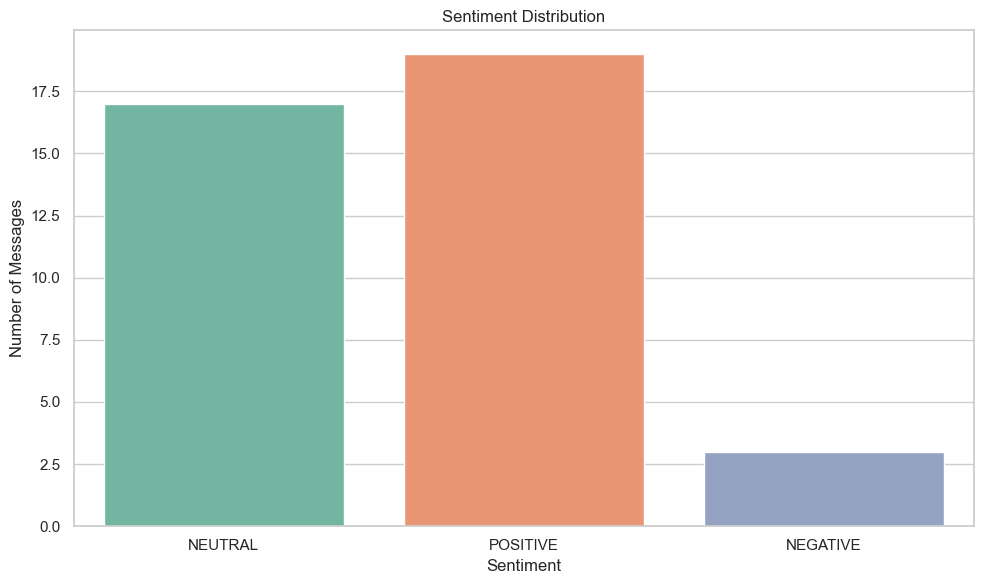

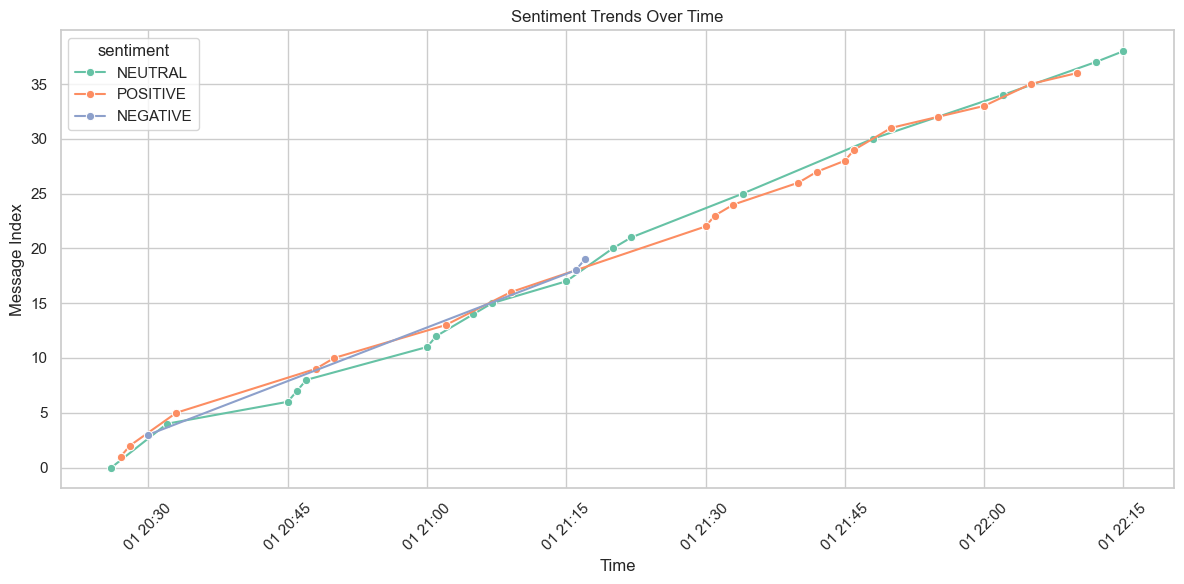

In [3]:
# Convert results to a DataFrame
df = pd.DataFrame(results)

# Convert timestamp to a datetime object for better visualization
df["timestamp"] = pd.to_datetime(df["timestamp"], format="%I:%M %p", errors="coerce")

# Print the DataFrame for verification
print("Sentiment Analysis DataFrame:")
print(df)

# Visualization: Sentiment distribution
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="sentiment", palette="Set2")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Messages")
plt.tight_layout()
plt.savefig("sentiment_distribution.png")
plt.show()

# Visualization: Sentiment trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="timestamp", hue="sentiment", palette="Set2", marker="o", estimator=None, y=df.index)
plt.title("Sentiment Trends Over Time")
plt.xlabel("Time")
plt.ylabel("Message Index")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("sentiment_trends_over_time.png")
plt.show()